In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
fifa=pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa.shape

(18207, 89)

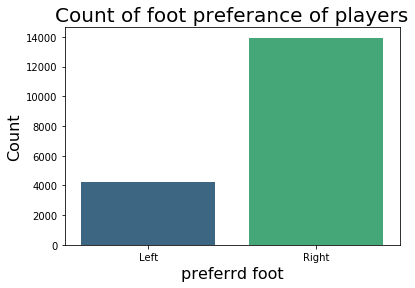

In [4]:
a=sns.countplot(x='Preferred Foot',data=fifa,palette="viridis")
a.set_title(label="Count of foot preferance of players",fontsize=20)
a.set_xlabel(xlabel="preferrd foot",fontsize=16)
a.set_ylabel(ylabel="Count",fontsize=16)
plt.show()

In [5]:
from collections import Counter
Counter(fifa['Preferred Foot']).items()

dict_items([('Left', 4211), ('Right', 13948), (nan, 48)])

In [6]:
#fifa["Weight"].split("lbs",)

In [7]:
fifa.Weight=[x.strip('lbs') if type (x)==str else x for x in fifa.Weight]
fifa.Weight.head(5)

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: object

In [8]:
fifa["Weight"]=fifa["Weight"].astype(float)
fifa["Weight"].head(5)

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [9]:
#fifa["Weight"]=fifa["Weight"] * 0.45
#fifa["Weight"].head(5)

In [10]:
#fifa["Weight"]=fifa["Weight"] / 2.205   # another way convert into kg
#fifa["Weight"].head(5)

In [11]:
fifa.Weight=[int(x.strip('lbs')) if type (x)==str else x for x in fifa.Weight]
light=fifa.loc[fifa.Weight<125].count()[0]
light

41

In [12]:
fifa.Weight=[int(x.strip('lbs')) if type (x)==str else x for x in fifa.Weight]
light_medium=fifa.loc[(fifa.Weight>=125)&(fifa.Weight<150)].count()[0]
light_medium

2290

In [13]:
fifa.Weight=[int(x.strip('lbs')) if type (x)==str else x for x in fifa.Weight]
medium=fifa.loc[(fifa.Weight>=150)&(fifa.Weight<175)].count()[0]
medium

10876

In [14]:
fifa.Weight=[int(x.strip('lbs')) if type (x)==str else x for x in fifa.Weight]
medium_heavy=fifa.loc[(fifa.Weight>=175)&(fifa.Weight<200)].count()[0]
medium_heavy

4583

In [15]:
fifa.Weight=[int(x.strip('lbs')) if type (x)==str else x for x in fifa.Weight]
heavy=fifa.loc[fifa.Weight>=200].count()[0]
heavy

369

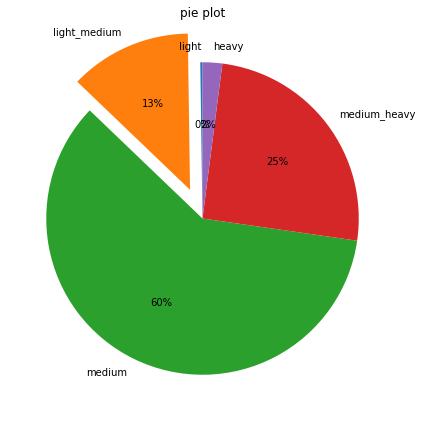

In [16]:
plt.figure(figsize=(7,8))
slices=[light,light_medium,medium,medium_heavy,heavy]
plt.pie(slices,
        labels=['light','light_medium','medium','medium_heavy','heavy'],
        startangle=90,                   
        shadow=False,
        explode=(0,0.2,0,0,0),             
        autopct='%1.0f%%')                
plt.title('pie plot')
plt.show()

In [17]:
#fifa['Rank_by_Overall'],fifa['Rank_by_Club']=fifa['Overall'],fifa['Club'].rank(ascending=False)

In [18]:
#fifa.head(2)

In [19]:
#team=fifa.groupby(['Club','Overall'])
#team.rank().nlargest(2)

In [33]:
fifa.groupby(['Club'])['Overall'].max().sort_values(ascending=False).head(2)

Club
Juventus        94
FC Barcelona    94
Name: Overall, dtype: int64

In [34]:
fifa.groupby(['Club'])['Overall'].max().sort_values(ascending=True).head(1)

Club
Bray Wanderers    58
Name: Overall, dtype: int64

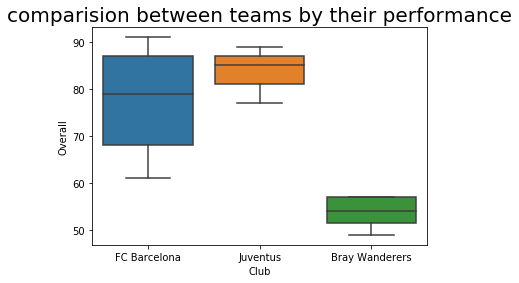

In [22]:
compare=('Juventus','FC Barcelona','Bray Wanderers')
fifa_compare=fifa.loc[fifa['Club'].isin(compare)& fifa['Overall']]
a=sns.boxplot(x="Club",y="Overall",data=fifa_compare);
a.set_title(label="comparision between teams by their performance",fontsize=20)
plt.show()